# Importing code

In [1]:
from utils import *
from model import *

# creating DataBunch 

train-jpg


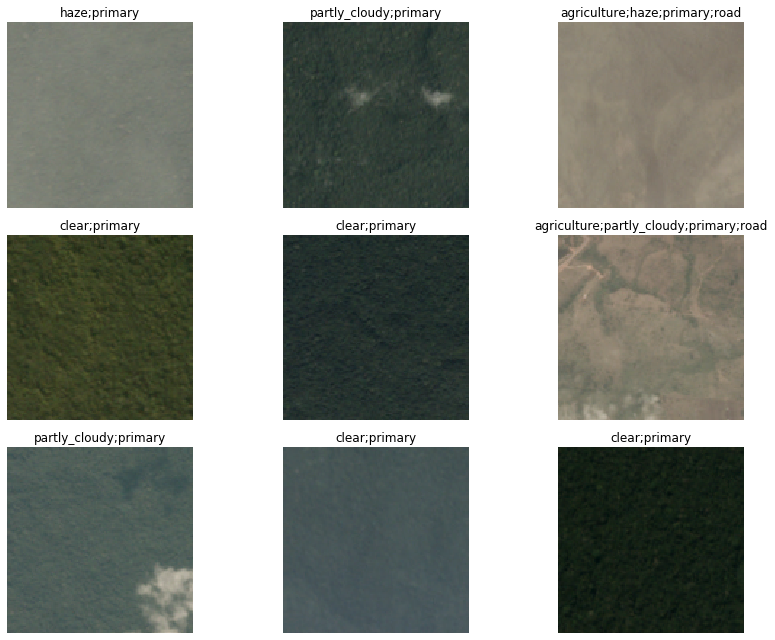

In [2]:
input_path = Path("./data")
data = preprocess_data(input_path)
data.show_batch(rows=3, figsize=(12,9))

# creating Models

In [3]:
archs = [
          models.resnet34,
          models.resnet50,     models.resnet101,
          models.resnet152,    models.densenet121,
          models.densenet161,  models.densenet169,
          models.densenet201
         ]
model = ensemble_model_trainer(archs)
model.build_learners(data)

/home/temp/anaconda3/envs/satellite/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [4]:
#model.load_model()

# Fine Tuning Models

## Training only last layers 

In [ ]:
model.freeze()
model.lr_finder()

Model : resnet34


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


Model : resnet34
Model : resnet50
Model : resnet101
Model : resnet152
Model : densenet121
Model : densenet161
Model : densenet169
Model : densenet201


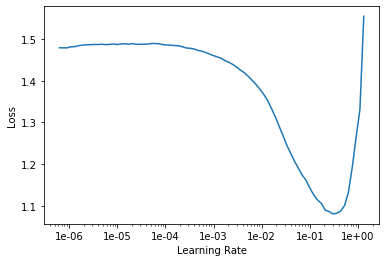

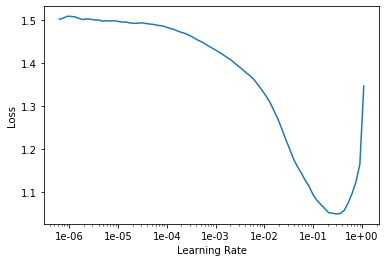

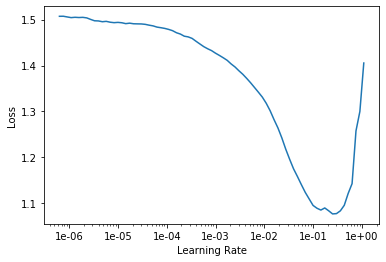

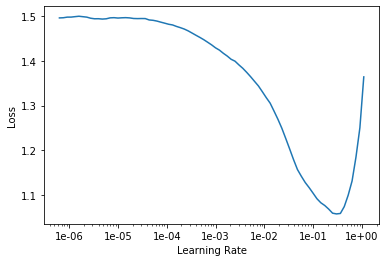

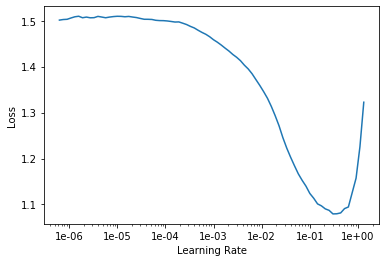

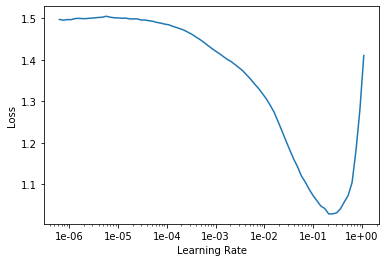

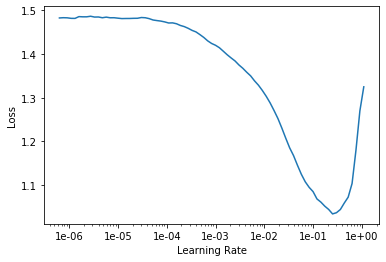

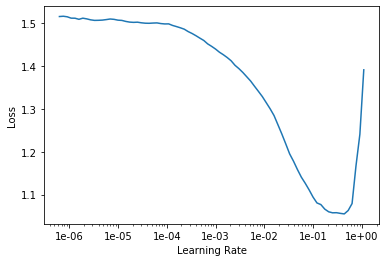

In [6]:
model.lr_finder_plot()

In [8]:
#choosing lr one order less than minimum
lrs = [slice(0.02),slice(0.03) ,slice(0.03),slice(0.03),slice(0.04), 
       slice(0.03),slice(0.03),slice(0.04)]
model.one_cycle_policy(lrs,5)

Model : resnet34


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.259039,0.231847,0.949242,0.912275,00:41
1,0.270211,0.236519,0.940334,0.909943,00:41
2,0.244370,0.210474,0.950071,0.920255,00:41
3,0.218928,0.204346,0.953602,0.921626,00:41
4,0.218771,0.199571,0.952643,0.923887,00:41


Model : resnet50


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.278386,0.255650,0.944643,0.905083,00:50
1,0.265322,0.244593,0.953225,0.909584,00:51
2,0.251237,0.219776,0.938960,0.916582,00:52
3,0.215926,0.197377,0.954402,0.925877,00:50
4,0.201012,0.191350,0.955317,0.927093,00:51


Model : resnet101


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.263678,0.254938,0.949366,0.903271,01:50
1,0.274323,0.253151,0.948203,0.905048,01:40
2,0.243406,0.223674,0.955891,0.916443,01:17
3,0.215286,0.213481,0.955826,0.921326,01:18
4,0.208577,0.205735,0.955964,0.924869,01:17


Model : resnet152


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.266260,0.248297,0.947826,0.907538,01:49
1,0.269549,0.226407,0.952861,0.917082,01:49
2,0.242354,0.272624,0.947150,0.918457,01:48
3,0.216472,0.214225,0.953130,0.922023,01:48
4,0.200557,0.228733,0.955659,0.926852,01:49


Model : densenet121


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.276929,0.278042,0.937027,0.899169,01:03
1,0.279822,0.249817,0.948930,0.911653,01:02
2,0.250949,0.220422,0.954009,0.917437,01:02
3,0.217880,0.195349,0.956669,0.925967,01:01
4,0.201885,0.188796,0.956495,0.928149,01:03


Model : densenet161


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.262391,0.235063,0.951829,0.913424,01:58
1,0.257702,0.233899,0.951909,0.913298,01:56
2,0.235599,0.282949,0.954489,0.913739,01:57
3,0.206434,0.232946,0.955027,0.925700,01:56
4,0.202375,0.206264,0.956327,0.928579,01:55


Model : densenet169


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.261404,0.232312,0.950754,0.913553,01:17
1,0.258543,0.239768,0.947418,0.908925,01:16
2,0.237469,0.242188,0.956458,0.919583,01:16
3,0.200486,0.258817,0.958166,0.926054,01:17
4,0.201231,0.194323,0.956393,0.929015,01:16


Model : densenet201


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.267750,0.246058,0.935712,0.908054,01:37
1,0.275951,0.342050,0.957439,0.908579,01:39
2,0.241814,3.032742,0.949998,0.917199,01:38
3,0.211967,0.410723,0.955731,0.924013,01:37
4,0.193574,0.373255,0.956676,0.927663,01:38


## Fine tuning whole models

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


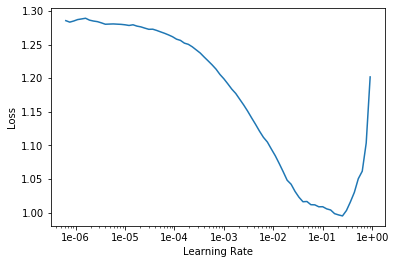

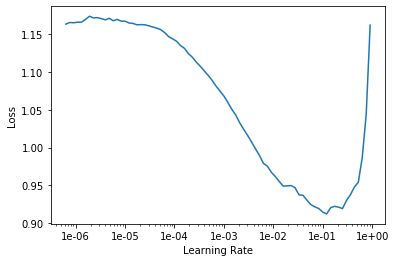

In [8]:
model.unfreeze()
model.lr_finder()
model.lr_finder_plot()

In [7]:
lrs = [slice(1e-06,1e-07) , slice(1e-05,1e-04)]
model.one_cycle_policy(lrs)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.254946,0.229323,0.946176,0.911954,01:01


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.237389,0.212124,0.949700,0.918927,01:06


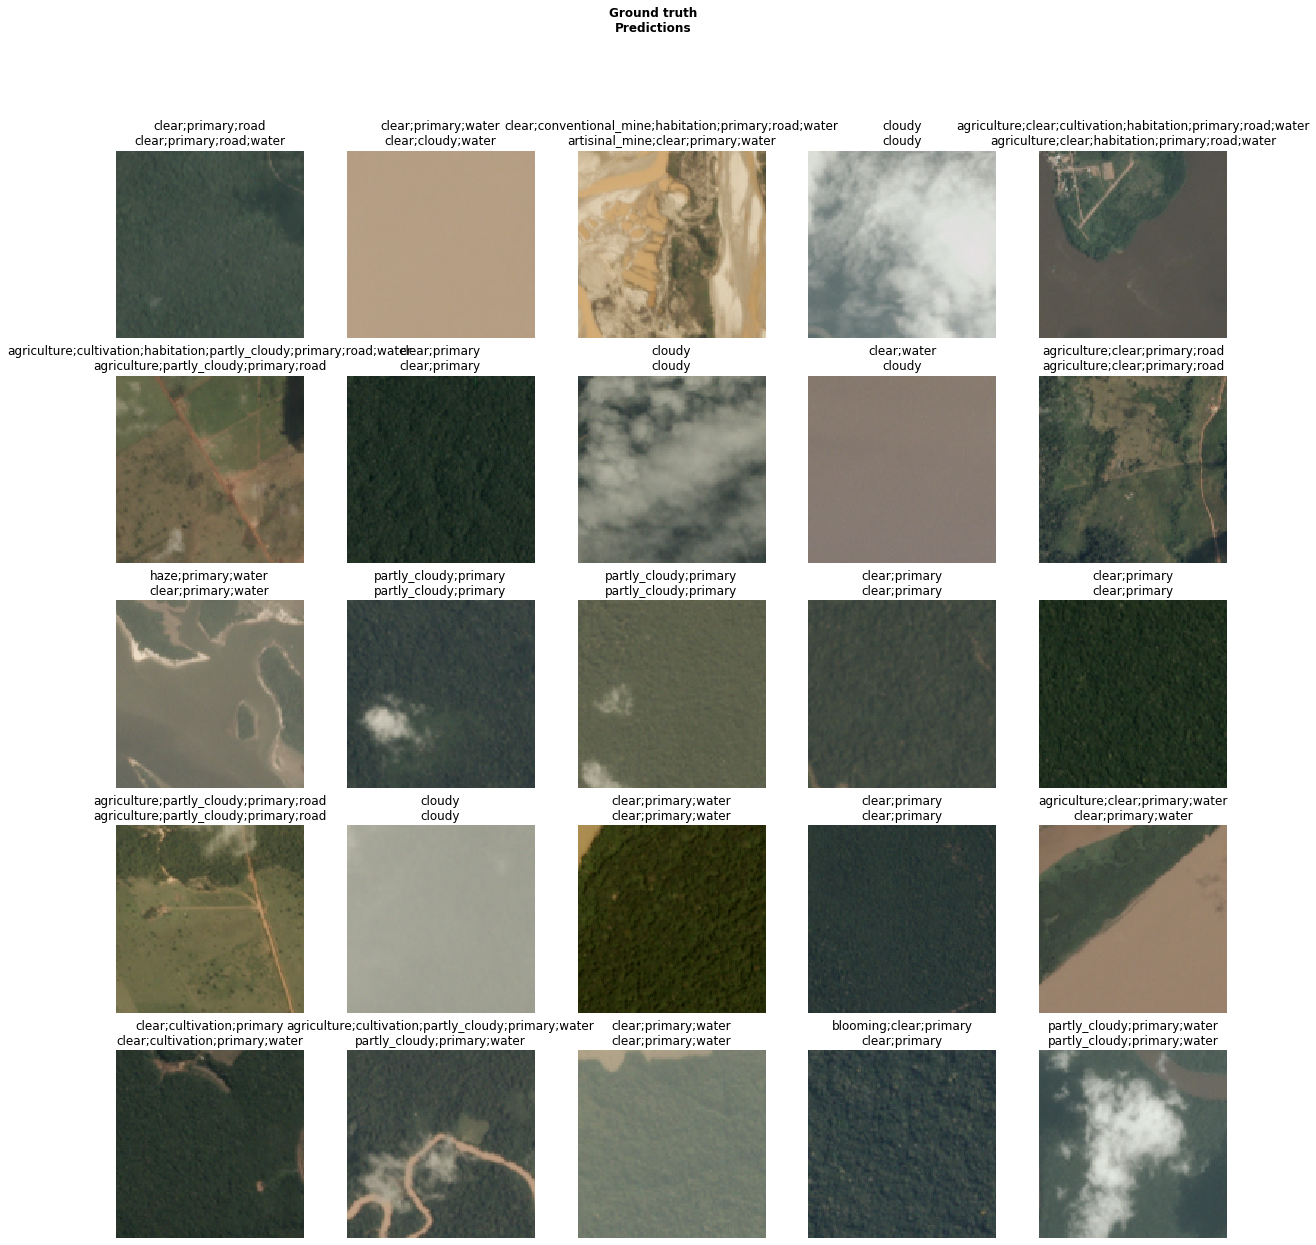

In [9]:
model.learners[1].show_results()

In [10]:
model.save_model()

data/models/resnet34.pth
data/models/resnet50.pth
data/models/resnet101.pth
data/models/resnet152.pth
data/models/densenet121.pth
data/models/densenet161.pth
data/models/densenet169.pth
data/models/densenet201.pth


## Loading saved Model

In [1]:
#you can start from here if you have saved model
from utils import *
from model import *
archs = [
          models.resnet34,
          models.resnet50,     models.resnet101,
          models.resnet152,    models.densenet121,
          models.densenet161,  models.densenet169,
          models.densenet201
         ]
input_path = Path("./data")
data = preprocess_data(input_path)
model = ensemble_model_trainer(archs)
model.build_learners(data)
model.load_model()



train-jpg


/home/temp/anaconda3/envs/satellite/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


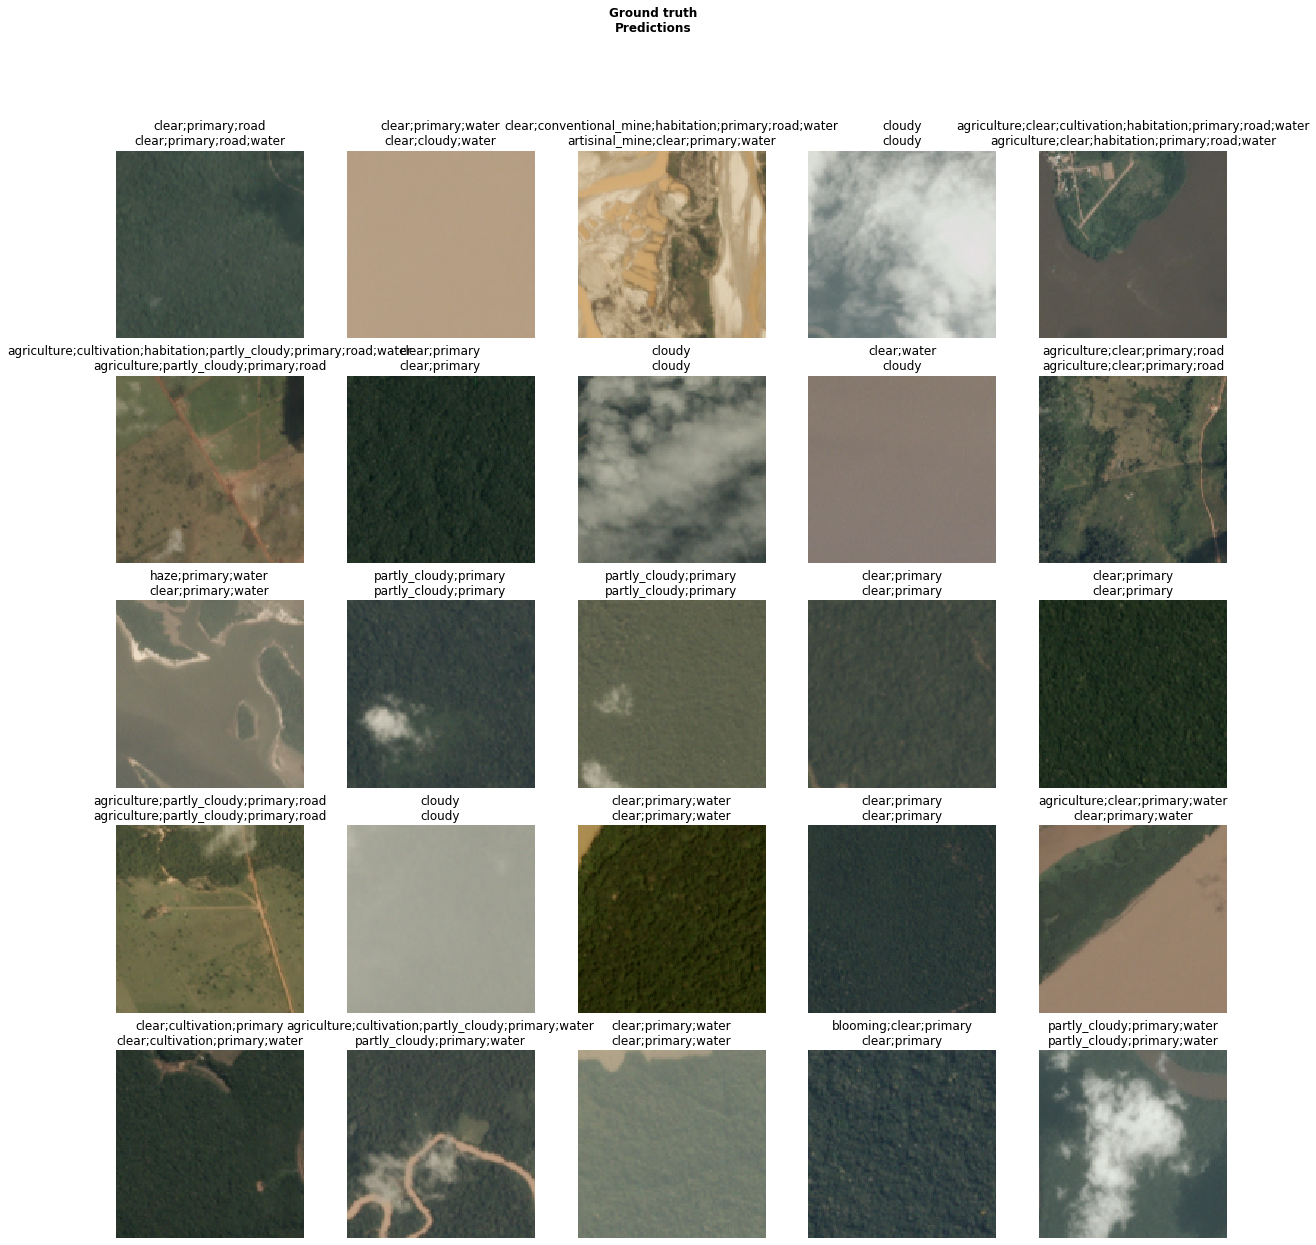

In [2]:
model.learners[1].show_results()

### extracts features from models , creates databunch for each label regressor and create a learner 

In [2]:
model.create_regressors(regressor = average_regressor )

In [3]:
#src = (ImageList.from_csv("./data", 'sample_submission_v2.csv', folder="test-jpg", suffix='.jpg').split_by_rand_pct(0.1).label_from_df(label_delim=' '))
#data1 = (src.transform( size=128).databunch().normalize(imagenet_stats))
acc_02 = partial(accuracy_thresh, thresh=0.2 , sigmoid = False)
f_score = partial(fbeta, thresh=0.2,beta=2 , sigmoid = False)
model.regressors.validate(model.regressors.data.train_dl , metrics = [acc_02 , f_score])
    

[0.21117352, tensor(0.9559), tensor(0.9028)]

In [4]:
ensembled_model = model.create_model()

In [5]:
ensembled_learner = Learner(data , ensembled_model)

In [ ]:
ensembled_learner.validate(data.valid_dl , metrics = [acc_02 , f_score])